In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
data = pd.read_csv('uber.csv')

In [3]:
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
data.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [8]:
data.shape

(200000, 9)

In [9]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [10]:
data = data.drop(['Unnamed: 0', 'key'], axis = 1)

In [11]:
data.shape

(200000, 7)

In [12]:
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [13]:
data['month'] = data['pickup_datetime']
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 19:52:06 UTC
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 20:04:56 UTC
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24 21:45:00 UTC
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26 08:22:21 UTC
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28 17:47:00 UTC
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28 10:49:00 UTC
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14 01:09:00 UTC
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,2009-06-29 00:42:00 UTC
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,2015-05-20 14:56:25 UTC


In [14]:
data['month'] = data['month'].str.slice(start = 5, stop = 7)
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,05
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,07
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,08
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,06
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,08
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,10
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,03
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,06
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,05


In [15]:
data['hour'] = data['pickup_datetime']
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hour
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,05,2015-05-07 19:52:06 UTC
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,07,2009-07-17 20:04:56 UTC
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,08,2009-08-24 21:45:00 UTC
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,06,2009-06-26 08:22:21 UTC
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,08,2014-08-28 17:47:00 UTC
...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,10,2012-10-28 10:49:00 UTC
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,03,2014-03-14 01:09:00 UTC
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,06,2009-06-29 00:42:00 UTC
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,05,2015-05-20 14:56:25 UTC


In [16]:
data['hour'] = data['hour'].str.slice(start = 11, stop = 13)
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hour
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,05,19
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,07,20
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,08,21
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,06,08
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,08,17
...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,10,10
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,03,01
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,06,00
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,05,14


In [17]:
data = data.drop(['pickup_datetime'], axis = 1)
data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,05,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,07,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,08,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,06,08
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,08,17
...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,10
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,03,01
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,06,00
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,05,14


In [18]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    200000 non-null  int64  
 6   month              200000 non-null  object 
 7   hour               200000 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [20]:
data["dropoff_longitude"]= data["dropoff_longitude"].fillna(data['dropoff_longitude'].mean())
data["dropoff_latitude"]= data["dropoff_latitude"].fillna(data['dropoff_latitude'].mean())

# data.dropna(inplace=True)------- Drop complete row

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  200000 non-null  float64
 4   dropoff_latitude   200000 non-null  float64
 5   passenger_count    200000 non-null  int64  
 6   month              200000 non-null  object 
 7   hour               200000 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [22]:
def haversine (lon_1, lon_2, lat_1, lat_2):
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    return km

In [23]:
data['distance'] = haversine(data['pickup_longitude'],data['dropoff_longitude'],data['pickup_latitude'],data['dropoff_latitude'])

In [24]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,20.856014
std,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997,382.963800
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.215222
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2.121005
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,3.875248
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135


In [25]:
data.replace(to_replace = 0, value = data['passenger_count'].mean(), inplace=True)
data.replace(to_replace = 0, value = data['distance'].mean(), inplace=True)
data[data['fare_amount'] <= 0] = data['fare_amount'].mean()

In [26]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.362407,-72.488497,39.965242,-72.486713,39.953240,1.691287,20.860885
std,9.896653,11.666136,7.562049,13.314895,6.614871,1.385145,382.473053
min,0.010000,-1340.648410,-74.015515,-3356.666300,-881.985513,1.000000,0.000084
25%,6.000000,-73.992065,40.734785,-73.991407,40.733817,1.000000,1.305244
50%,8.500000,-73.981821,40.752590,-73.980091,40.753040,1.000000,2.121431
75%,12.500000,-73.967148,40.767157,-73.963653,40.767999,2.000000,3.876122
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  200000 non-null  float64
 4   dropoff_latitude   200000 non-null  float64
 5   passenger_count    200000 non-null  float64
 6   month              200000 non-null  object 
 7   hour               200000 non-null  object 
 8   distance           200000 non-null  float64
dtypes: float64(7), object(2)
memory usage: 13.7+ MB


In [28]:
data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hour,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,05,19,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,07,20,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,08,21,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,06,08,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,08,17,4.475450
...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1.0,10,10,0.112210
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1.0,03,01,1.875050
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2.0,06,00,12.850319
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1.0,05,14,3.539715


fare_amount              Axes(0.125,0.77;0.352273x0.11)
pickup_longitude      Axes(0.547727,0.77;0.352273x0.11)
pickup_latitude         Axes(0.125,0.638;0.352273x0.11)
dropoff_longitude    Axes(0.547727,0.638;0.352273x0.11)
dropoff_latitude        Axes(0.125,0.506;0.352273x0.11)
passenger_count      Axes(0.547727,0.506;0.352273x0.11)
distance                Axes(0.125,0.374;0.352273x0.11)
dtype: object

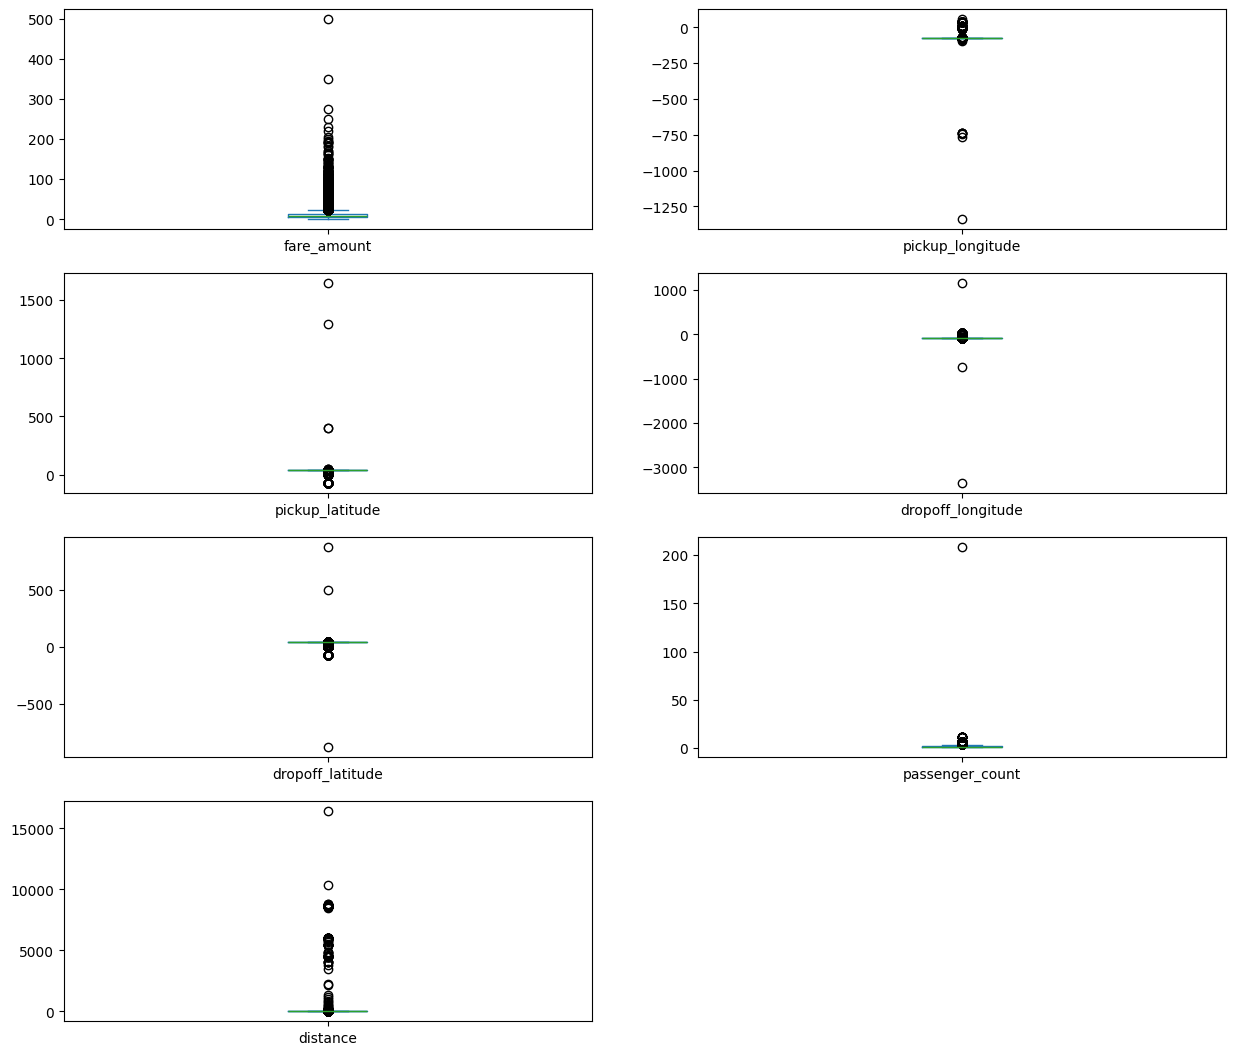

In [29]:
data.plot(kind = "box",subplots = True, layout = (6,2),figsize=(15,20))

In [30]:
# Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    data[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(data , c)
    return df1

In [31]:
cols = ['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance']
data = treat_outliers_all(data , cols)

fare_amount              Axes(0.125,0.77;0.352273x0.11)
pickup_longitude      Axes(0.547727,0.77;0.352273x0.11)
pickup_latitude         Axes(0.125,0.638;0.352273x0.11)
dropoff_longitude    Axes(0.547727,0.638;0.352273x0.11)
dropoff_latitude        Axes(0.125,0.506;0.352273x0.11)
passenger_count      Axes(0.547727,0.506;0.352273x0.11)
distance                Axes(0.125,0.374;0.352273x0.11)
dtype: object

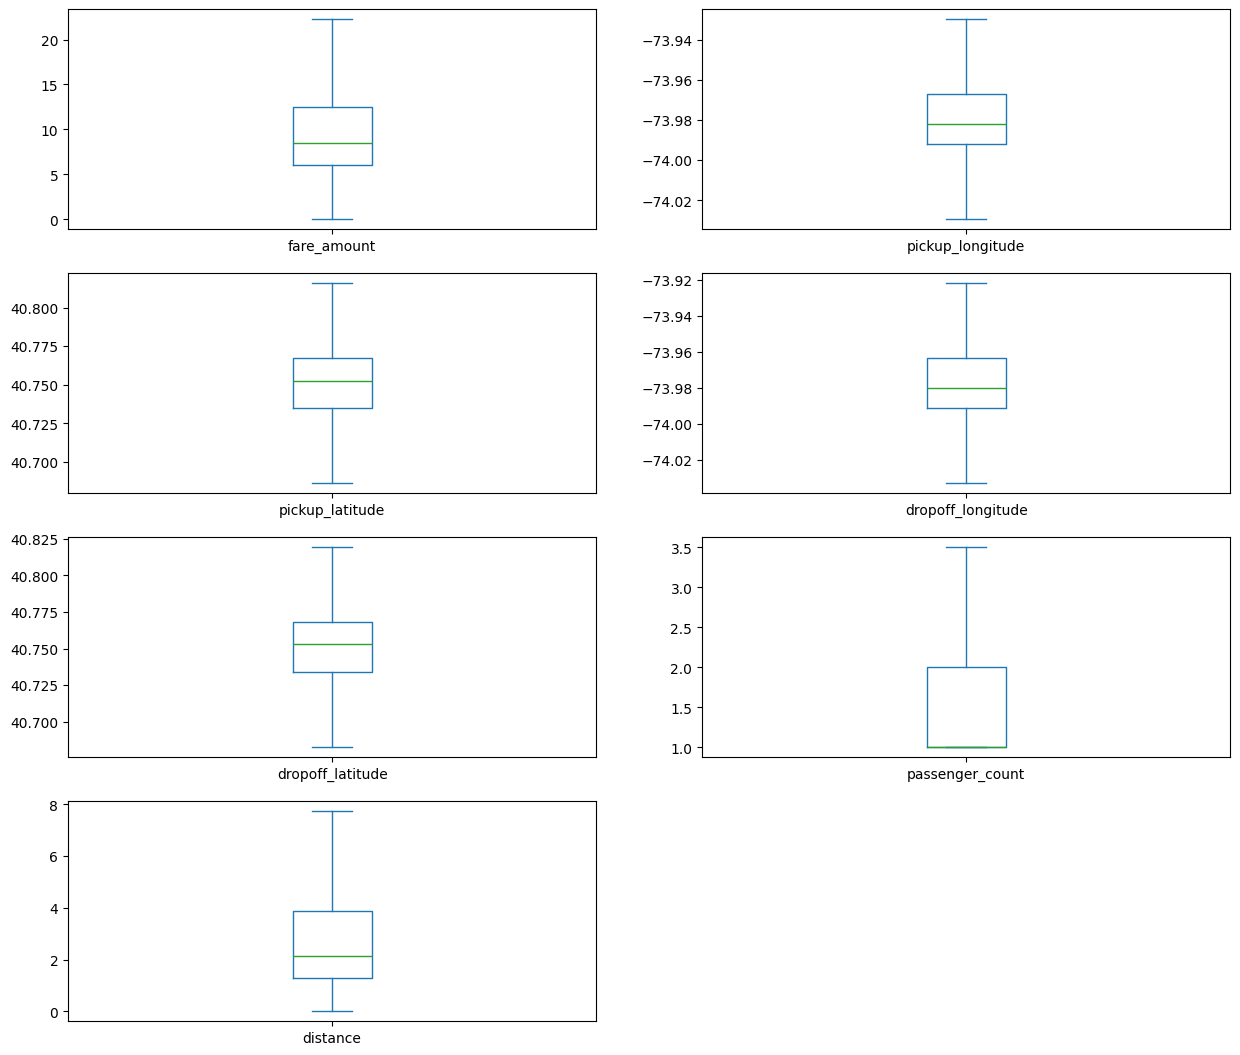

In [32]:
data.plot(kind = "box",subplots = True, layout = (6,2),figsize=(15,20))

In [33]:
data.shape

(200000, 9)

In [34]:
data.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
month                0
hour                 0
distance             0
dtype: int64

VISUALIZATION

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'fare_amount')

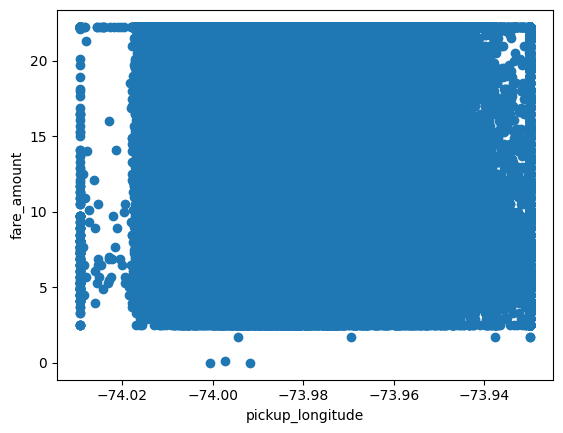

In [36]:
plt.scatter(data['pickup_longitude'], data['fare_amount'])
plt.xlabel("pickup_longitude")
plt.ylabel("fare_amount")

Text(0, 0.5, 'fare_amount')

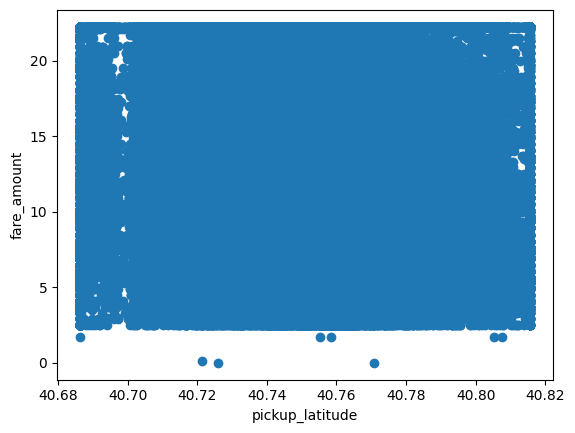

In [37]:
plt.scatter(data['pickup_latitude'], data['fare_amount'])
plt.xlabel("pickup_latitude")
plt.ylabel("fare_amount")

Text(0, 0.5, 'fare_amount')

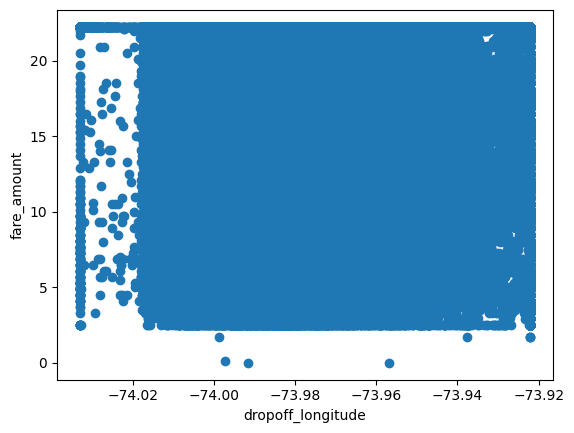

In [38]:
plt.scatter(data['dropoff_longitude'], data['fare_amount'])
plt.xlabel("dropoff_longitude")
plt.ylabel("fare_amount")

Text(0, 0.5, 'fare_amount')

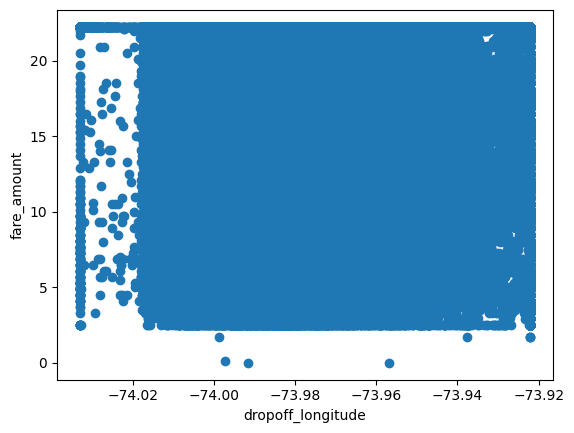

In [39]:
plt.scatter(data['dropoff_longitude'], data['fare_amount'])
plt.xlabel("dropoff_longitude")
plt.ylabel("fare_amount")

Text(0, 0.5, 'fare_amount')

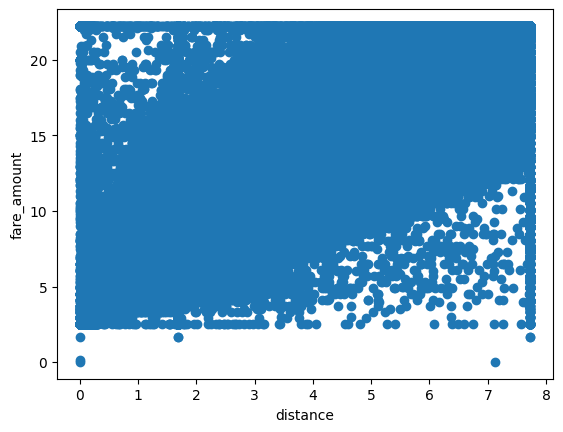

In [40]:
plt.scatter(data['distance'], data['fare_amount'])
plt.xlabel("distance")
plt.ylabel("fare_amount")

In [41]:
corr_matrix = data.corr()
corr_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hour,distance
fare_amount,1.000000,0.154189,-0.110927,0.218764,-0.125988,0.014649,0.030658,-0.023619,0.858832
pickup_longitude,0.154189,1.000000,0.258704,0.425930,0.072689,-0.012819,0.001483,0.011517,0.134118
pickup_latitude,-0.110927,0.258704,1.000000,0.048264,0.515985,-0.013306,0.001252,0.029740,-0.082360
dropoff_longitude,0.218764,0.425930,0.048264,1.000000,0.244958,-0.008774,0.002689,-0.046666,0.224214
dropoff_latitude,-0.125988,0.072689,0.515985,0.244958,1.000000,-0.006609,-0.001492,0.019840,-0.072548
passenger_count,0.014649,-0.012819,-0.013306,-0.008774,-0.006609,1.000000,0.009978,0.019967,0.009658
month,0.030658,0.001483,0.001252,0.002689,-0.001492,0.009978,1.000000,-0.003946,0.012280
hour,-0.023619,0.011517,0.029740,-0.046666,0.019840,0.019967,-0.003946,1.000000,-0.038710
distance,0.858832,0.134118,-0.082360,0.224214,-0.072548,0.009658,0.012280,-0.038710,1.000000


<Axes: >

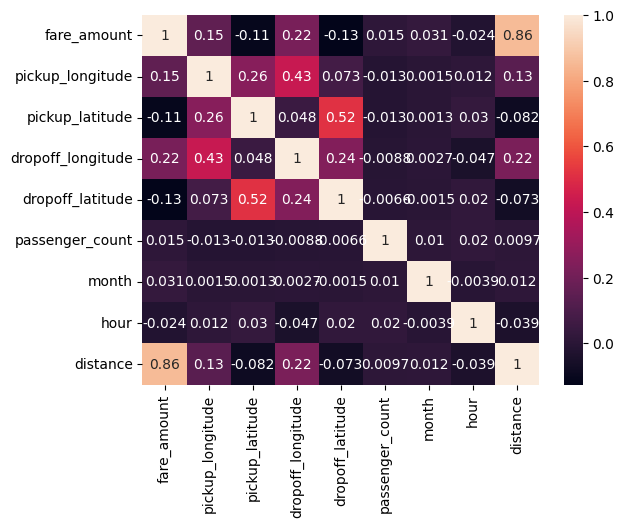

In [42]:
sns.heatmap(corr_matrix, annot = True)

Spliting the dataset

In [43]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
print(X.shape, y.shape)

(200000, 8) (200000,)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(170000, 8) (170000,) (30000, 8) (30000,)


Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X_train, y_train)

In [46]:
linear_regression.score(X_test, y_test)

0.7316136867718928

In [47]:
y_pred = linear_regression.predict(X_test)

result = pd.DataFrame()
result['Actual'], result['Predicted'] = y_test, y_pred
result.sample(10)

,Actual,Predicted
181472,6.1,7.991441
166928,6.5,10.012422
111101,6.5,6.479512
53910,8.0,7.952925
182286,6.1,7.169403
195170,7.7,7.816518
35302,13.3,11.196338
48466,6.9,7.544216
180812,4.5,5.737955
27991,6.5,8.048700


In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 1.8763278733130264
Mean Squared Error: 7.95833566689987
Root Mean Squared Error: 2.821052226900429
R Squared (R²): 0.8553441919905067


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 10, random_state = 42)

random_forest.fit(X_train, y_train)

In [ ]:
random_forest.score(X_test, y_test)

In [51]:
y_pred = random_forest.predict(X_test)

result = pd.DataFrame()
result['Actual'], result['Predicted'] = y_test, y_pred
result.sample(10)

,Actual,Predicted
108389,7.70,9.50
16131,9.00,9.33
138295,22.25,19.76
32169,11.50,9.28
172860,5.00,4.77
20218,11.70,14.53
136756,7.70,10.04
148663,5.30,5.20
13249,2.90,7.17
78967,11.00,9.70


In [52]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 1.7530684681716462
Mean Squared Error: 7.336604392865712
Root Mean Squared Error: 2.7086166936031595
R Squared (R²): 0.8675142105331833
